In [8]:
import pandas as pd

In [9]:
df = pd.read_csv("Cine_tenis.csv")

In [10]:
df.head()

,Weekend,Weather,Parents,Money,Decision
0,w1,sunny,yes,Rich,Cinema
1,w2,sunny,no,Rich,Tennis
2,w3,windy,yes,Rich,Cinema
3,w4,rainy,yes,poor,Cinema
4,w5,rainy,no,Rich,Stay in


In [11]:
df.drop('Weekend',axis=1,inplace=True)

In [12]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [13]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [14]:
X

,Weather,Parents,Money
0,sunny,yes,Rich
1,sunny,no,Rich
2,windy,yes,Rich
3,rainy,yes,poor
4,rainy,no,Rich
5,rainy,yes,poor
6,windy,no,poor
7,windy,no,Rich
8,windy,yes,Rich
9,sunny,no,Rich


In [15]:
y

0      Cinema
1      Tennis
2      Cinema
3      Cinema
4     Stay in
5      Cinema
6      Cinema
7    Shooping
8      Cinema
9      Tennis
Name: Decision, dtype: object

In [16]:
model.fit(X, y)

ValueError: could not convert string to float: 'sunny'

In [19]:
df

,Weather,Parents,Money,Decision
0,sunny,yes,Rich,Cinema
1,sunny,no,Rich,Tennis
2,windy,yes,Rich,Cinema
3,rainy,yes,poor,Cinema
4,rainy,no,Rich,Stay in
5,rainy,yes,poor,Cinema
6,windy,no,poor,Cinema
7,windy,no,Rich,Shooping
8,windy,yes,Rich,Cinema
9,sunny,no,Rich,Tennis


In [21]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() #instance of label encoder -  it is used to convert string to number


df_conv = pd.DataFrame() # Created an empty data Frame


df_conv['Weather'] =  le.fit_transform(df['Weather'])
df_conv['Parents'] =  le.fit_transform(df['Parents'])
df_conv['Money'] =    le.fit_transform(df['Money'])
df_conv['Decision'] = le.fit_transform(df['Decision'])


In [22]:
df_conv

,Weather,Parents,Money,Decision
0,1,1,0,0
1,1,0,0,3
2,2,1,0,0
3,0,1,1,0
4,0,0,0,2
5,0,1,1,0
6,2,0,1,0
7,2,0,0,1
8,2,1,0,0
9,1,0,0,3


In [23]:
X = df_conv.iloc[:,:-1]
y = df_conv.iloc[:,-1]

In [26]:
X

,Weather,Parents,Money
0,1,1,0
1,1,0,0
2,2,1,0
3,0,1,1
4,0,0,0
5,0,1,1
6,2,0,1
7,2,0,0
8,2,1,0
9,1,0,0


In [27]:
model.fit(X, y)


DecisionTreeClassifier()

In [28]:
model.score(X,y)

1.0

In [29]:
#df.Decision.unique()

In [30]:
#!pip install matplotlib==3.5.2


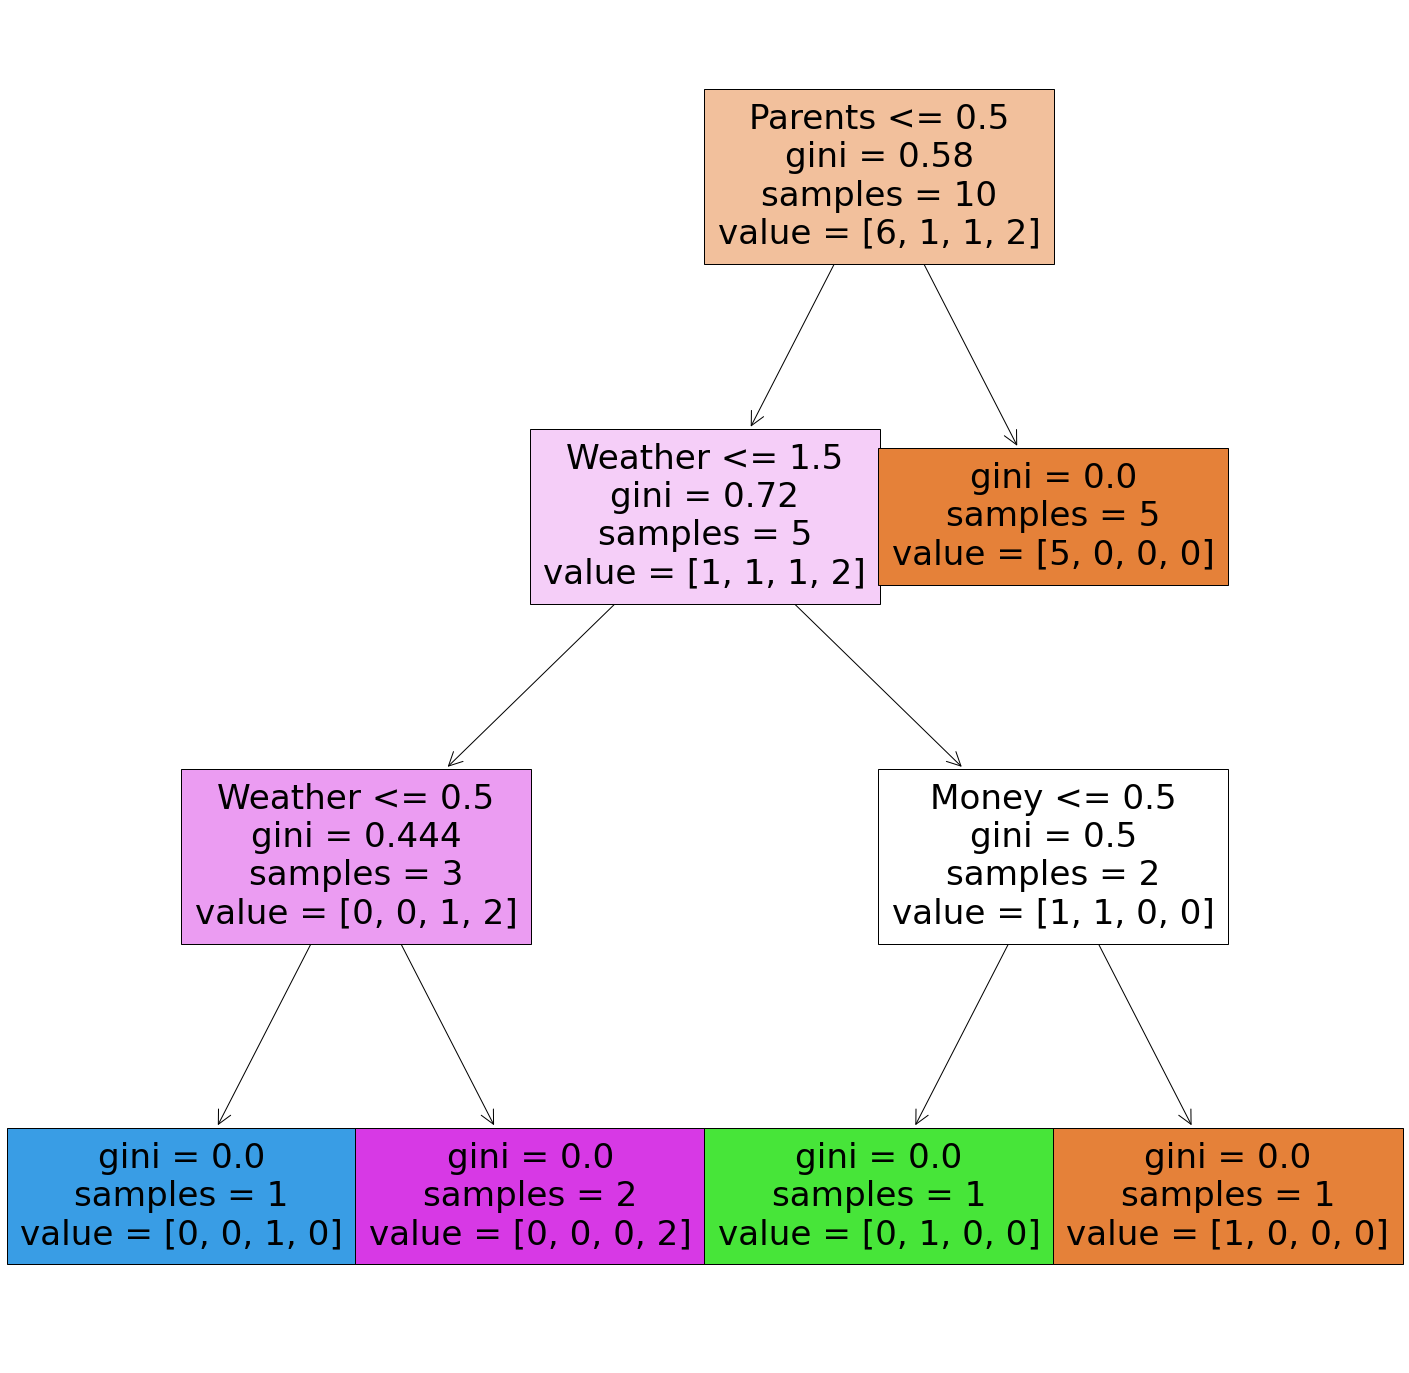

In [33]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,25))

tree.plot_tree(model,feature_names=X.columns,filled=True)
plt.show()

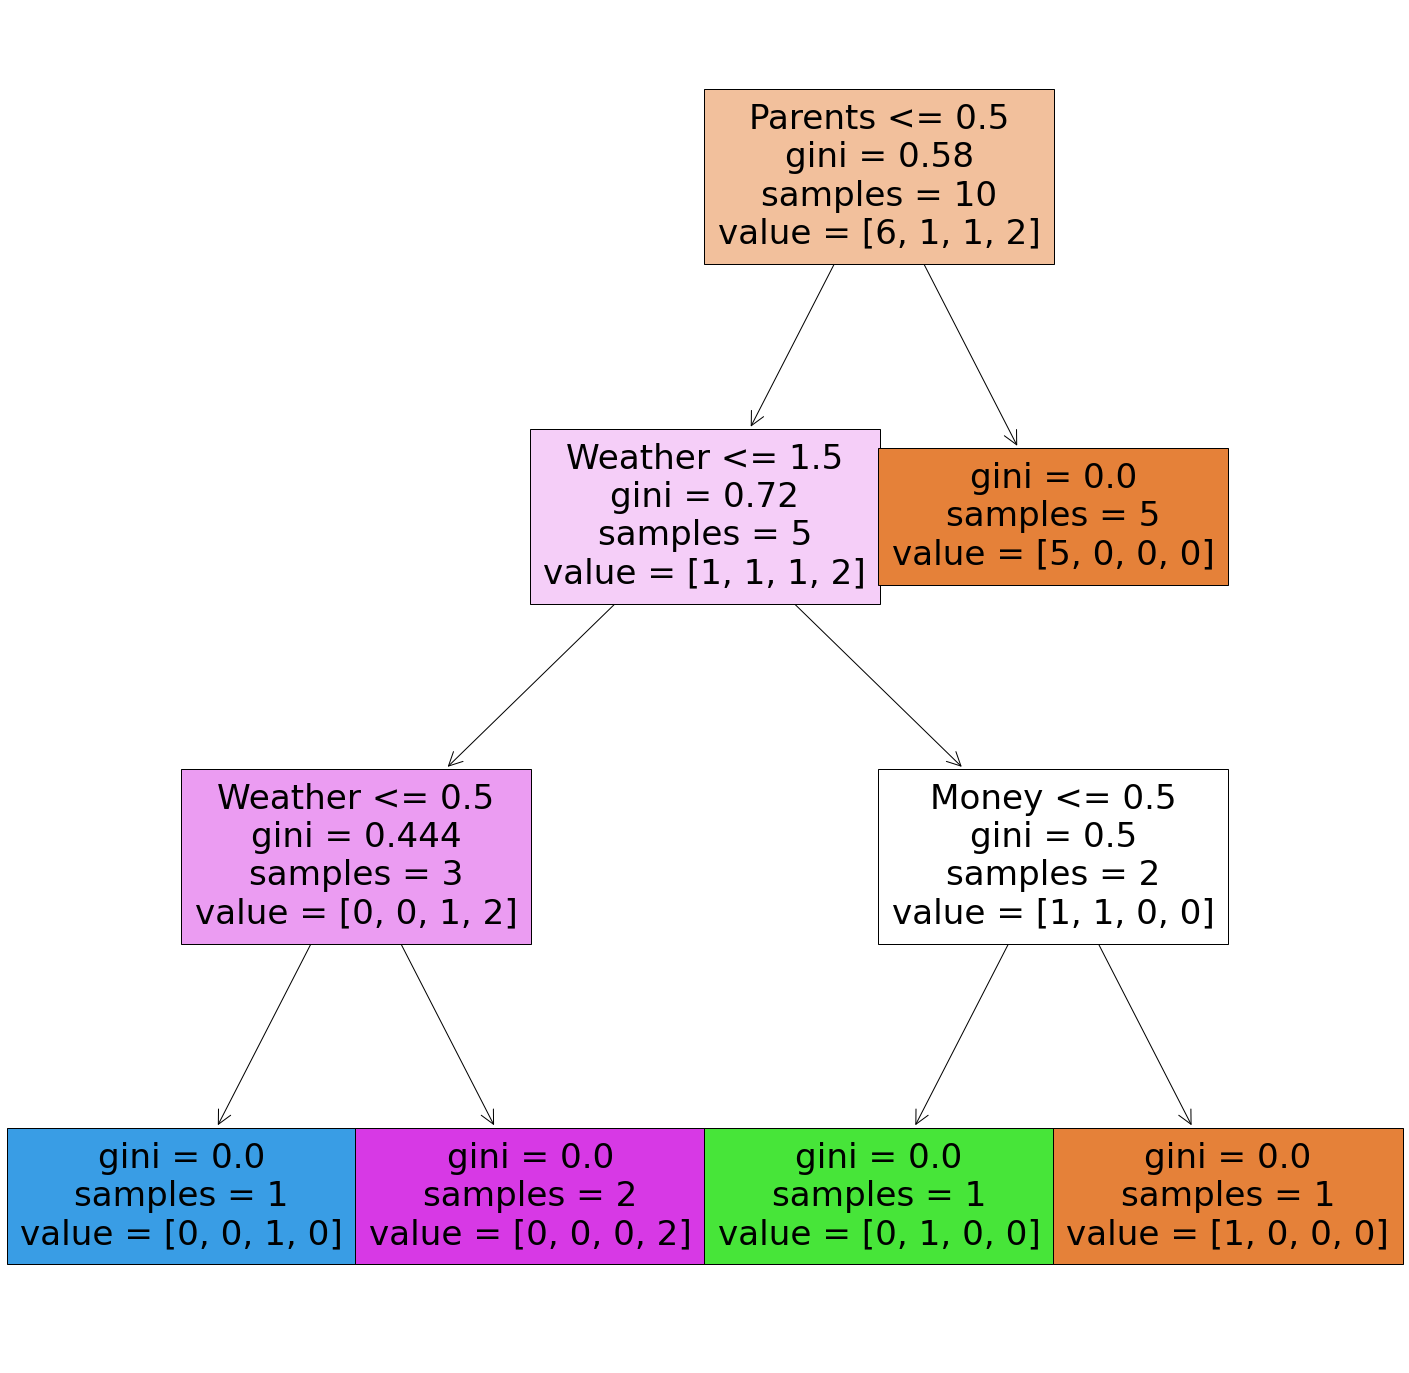

In [24]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,25))
tree.plot_tree(model,feature_names=X.columns,filled=True)
plt.show()

In [10]:
X

,Weather,Parents,Money
0,1,1,0
1,1,0,0
2,2,1,0
3,0,1,1
4,0,0,0
5,0,1,1
6,2,0,1
7,2,0,0
8,2,1,0
9,1,0,0


In [22]:
model.feature_importances_

array([0.44827586, 0.37931034, 0.17241379])

In [23]:
model.set_params()

DecisionTreeClassifier()

In [55]:
model = tree.DecisionTreeClassifier(splitter="random")

In [56]:
model.fit(X, y)


DecisionTreeClassifier(splitter='random')

In [57]:
model.score(X,y)

1.0

[Text(0.5, 0.9, 'Parents <= 0.598\ngini = 0.58\nsamples = 10\nvalue = [6, 1, 1, 2]\nclass = Cinema'),
 Text(0.3333333333333333, 0.7, 'Weather <= 0.056\ngini = 0.72\nsamples = 5\nvalue = [1, 1, 1, 2]\nclass = Shooping'),
 Text(0.16666666666666666, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0]\nclass = Stay in'),
 Text(0.5, 0.5, 'Weather <= 1.924\ngini = 0.625\nsamples = 4\nvalue = [1, 1, 0, 2]\nclass = Shooping'),
 Text(0.3333333333333333, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 2]\nclass = Shooping'),
 Text(0.6666666666666666, 0.3, 'Money <= 0.625\ngini = 0.5\nsamples = 2\nvalue = [1, 1, 0, 0]\nclass = Cinema'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0]\nclass = Tennis'),
 Text(0.8333333333333334, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0]\nclass = Cinema'),
 Text(0.6666666666666666, 0.7, 'gini = 0.0\nsamples = 5\nvalue = [5, 0, 0, 0]\nclass = Cinema')]

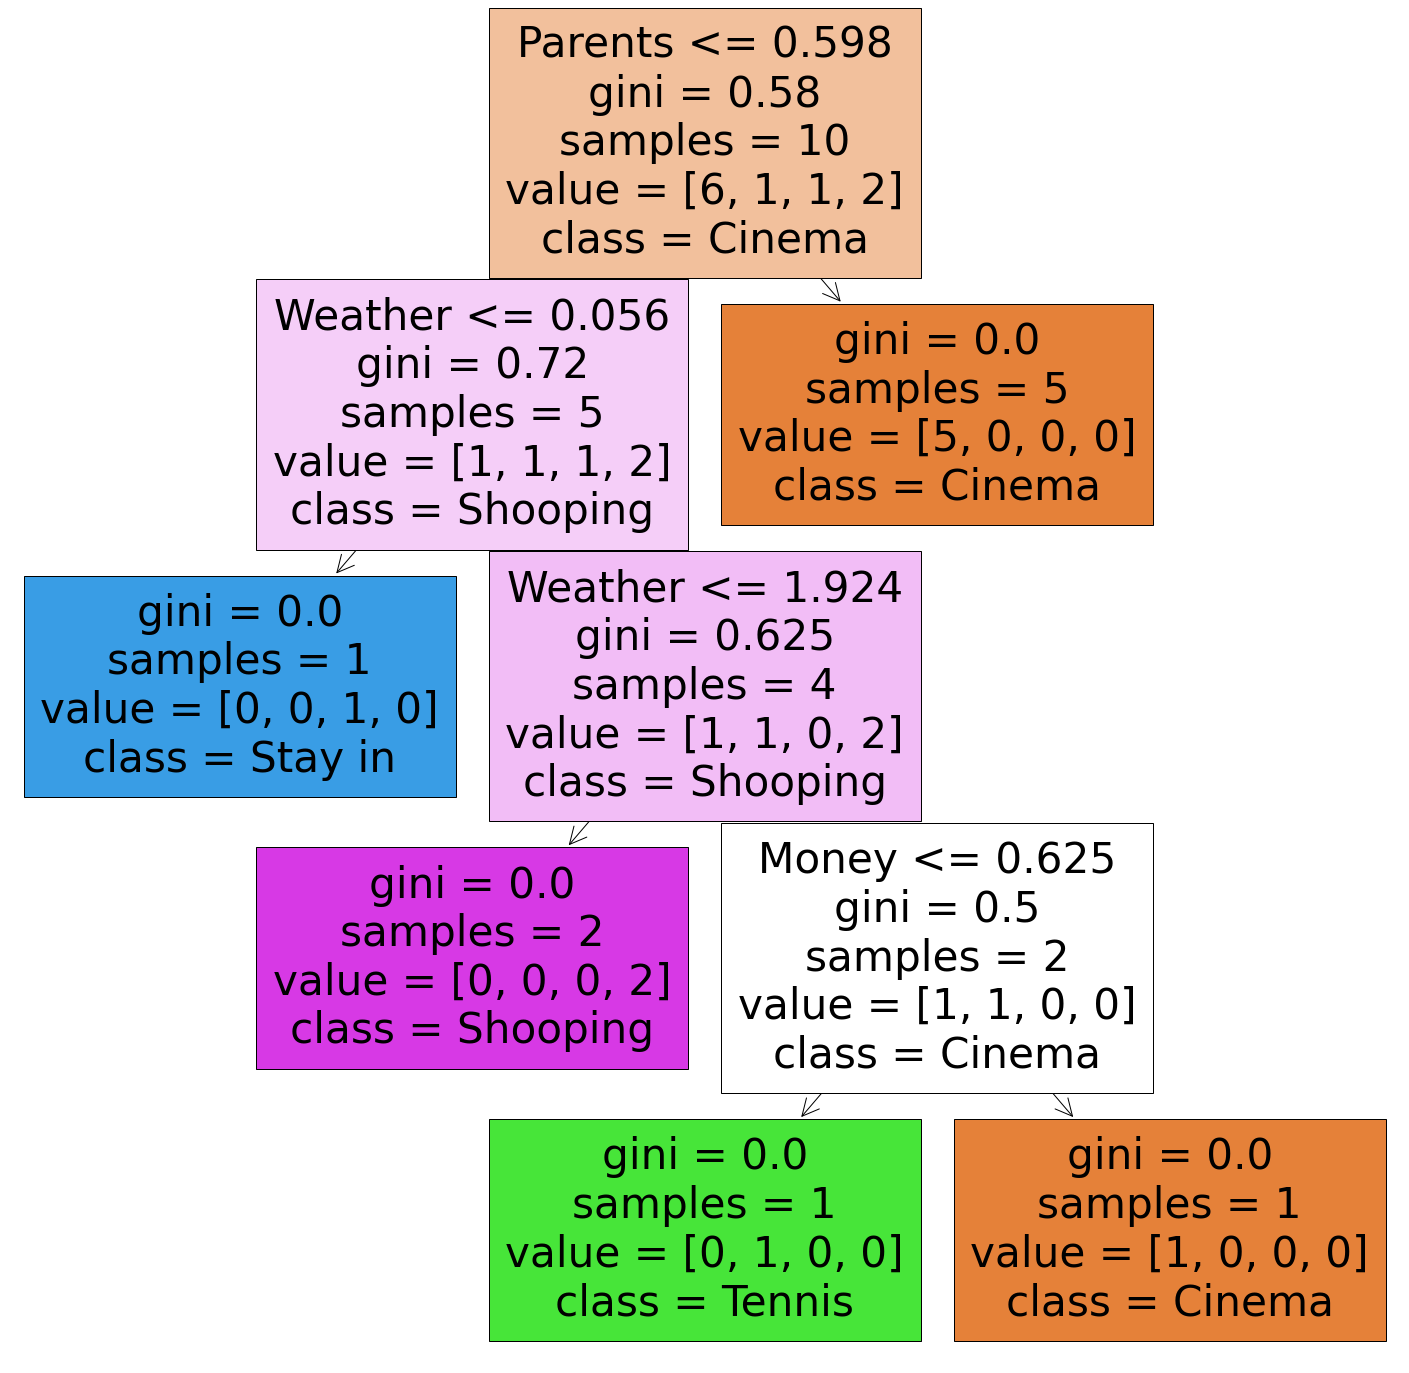

In [58]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,25))
tree.plot_tree(model,filled=True,feature_names=X.columns,class_names=df.Decision.unique())